<a href="https://colab.research.google.com/github/rafaelherbster/Alura_Curso_Numpy/blob/main/Desafio_do_curso_numpy_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O dataset utilizado para esse desafio é uma versão modificada do arquivo presente no Kaggle:
https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

O link do arquivo raw que vamos usar (aquele usamos para ler direto do Github) é esse aqui:
https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv

# Leitura dos dados

Se você clicar no link verá que temos um arquivo com 6 colunas, sendo a primeira coluna do arquivo uma coluna de texto e a primeira linha do arquivo também é uma coluna de texto.

Aqui o desafio é ler esse arquivo. Para isso importe a numpy e use a função loadtxt. Use o link da url, o parâmetro usecols para pular a primeira coluna. Você pode usar np.arange para criar a sequência de números que representam as colunas. Por fim, você também deve incluir o parâmetro skiprows=1 para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [1]:
import numpy as np

In [2]:
og_dataset = np.loadtxt('https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv', delimiter=',', usecols=np.arange(1,6), skiprows=1)

# Seleção de dados

Desses a colunas que iremos avaliar são as de diâmetro e peso. Crie um arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmtro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

In [3]:
orange_diameter = og_dataset[:5000,0]
orange_weight = og_dataset[:5000,1]
grapefruit_diameter = og_dataset[5000:,0]
grapefruit_weight = og_dataset[5000:,1]

# Visualização de dados

Importe a biblioteca matplotlib e crie um gráfico separado para a laranja e outro para a toranja do peso pelo diâmetro.

In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Weight (g)')

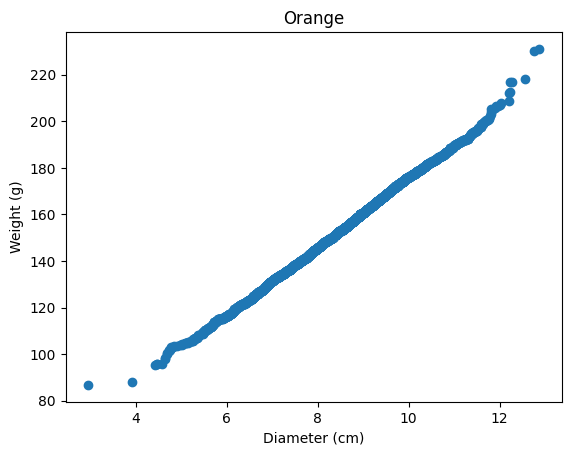

In [9]:
plt.plot(orange_diameter, orange_weight, 'o')
plt.title('Orange')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')

Text(0, 0.5, 'Weight (g)')

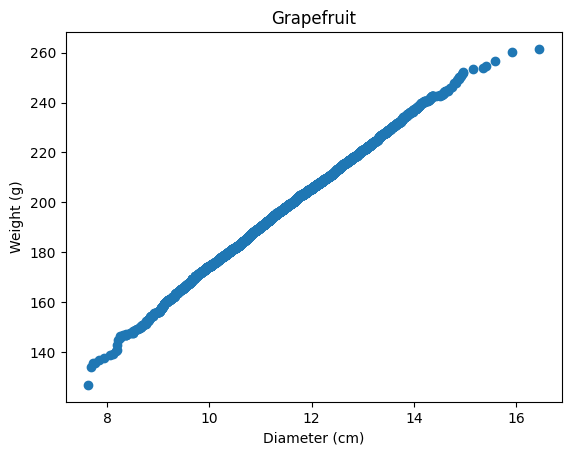

In [10]:
plt.plot(grapefruit_diameter, grapefruit_weight, 'o')
plt.title('Grapefruit')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')

# O coeficiente das retas

As duas parecem ter uma inclinação muito parecida em uma primeira inspeção visual vamos determinar os coeficientes da reta para cada um dos casos.

Lembre que para o coeficiente angular precisamos implementar a função:
$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$

e para o coeficiente linear:
$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$


Perceba que nesse caso o X é o diâmtro e o Y é o peso. Além disso o n é o número de elementos dentro do X, por exemplo.Ele vai ser diferente para a laranja e toranja. Determine o coefiecente para cada caso:

In [26]:
#Oranges
X = orange_diameter
Y = orange_weight
n = np.size(X)

In [27]:
a = ((n*np.sum(X*Y)) - (np.sum(X)*np.sum(Y)))/((n*np.sum(np.power(X,2))) - (np.power(np.sum(X),2)))
a

np.float64(14.7997452319846)

In [28]:
b = np.mean(Y) - a*np.mean(X)
b

np.float64(27.38560381218413)

Text(0, 0.5, 'Weight (g)')

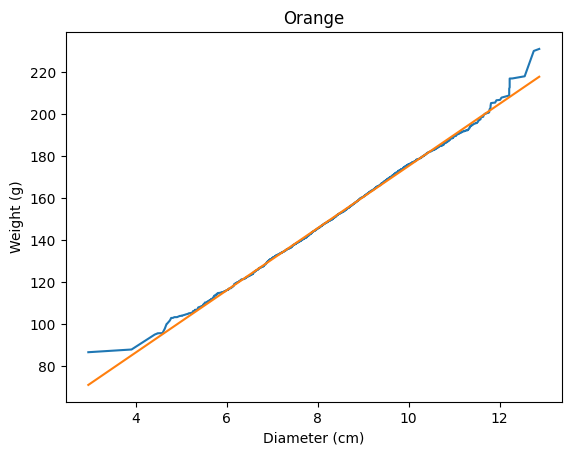

In [17]:
plt.plot(X, Y)
plt.plot(X, a*X + b)
plt.title('Orange')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')

In [18]:
#Grapefruits
X = grapefruit_diameter
Y = grapefruit_weight
n = np.size(X)

In [22]:
a = ((n*np.sum(X*Y)) - (np.sum(X)*np.sum(Y)))/((n*np.sum(np.power(X,2))) - (np.power(np.sum(X),2)))
a

np.float64(15.70884459360376)

In [23]:
b = np.mean(Y) - a*np.mean(X)
b

np.float64(17.007102876817726)

Text(0, 0.5, 'Weight (g)')

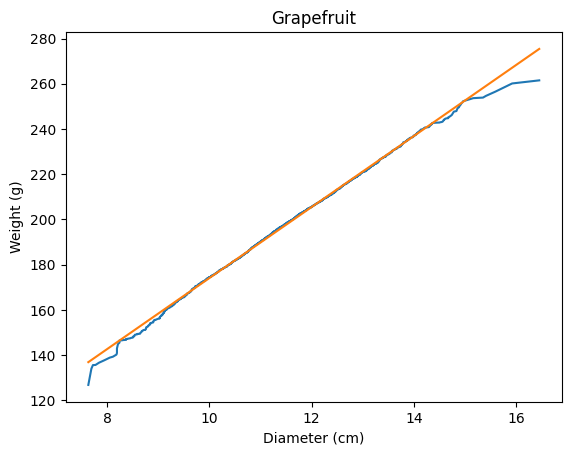

In [21]:
plt.plot(X, Y)
plt.plot(X, a*X + b)
plt.title('Grapefruit')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')

Se deu tudo você deve ter chegado em valores diferentes para cada um dos casos. Então, embora a inclinação da reta seja parecida nós descobrimos que os coeficientes da reta servem como uma forma de diferenciar se as frutas são laranjas ou toranjas.

# Estimando através de números aleatórios

Agora ao invés de usar a fórmula fechada utilize a np.random.uniform para gerar valores aleatórios para determinar o coeficiente angular da toranja. Nesse caso vamos assumir que b é igual a 17. Utilize o random.seed(84).

In [40]:
#Grapefruit
X = grapefruit_diameter
Y = grapefruit_weight
n = np.size(X)

In [41]:
b =17

norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))


Se deu tudo certo a menor norma que você alcançou foi 104.40529157196431.

In [42]:
np.min(norma)

np.float64(104.40529157196431)

Algo que não foi passado no curso é que também podemos utilizar condições dentro dos colchetes dos arrays para encontrar um determinado valor. O código abaixo mostra o coeficiente angular que corresponde ao menor valor da norma. Repare que a condição é a: norma == np.min(norma).

In [43]:
coef_angulares[norma == np.min(norma)]

array([15.82512199])

Text(0, 0.5, 'Weight (g)')

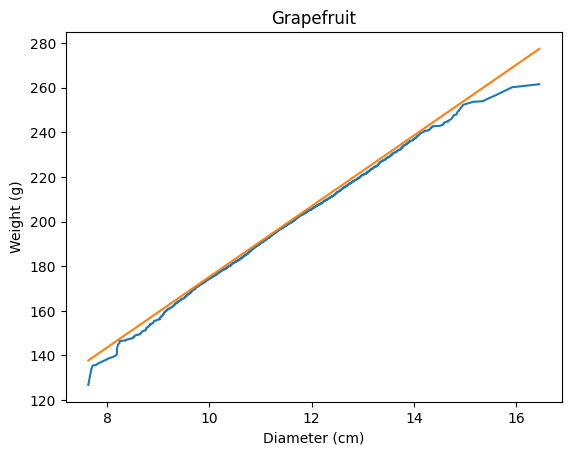

In [45]:
plt.plot(X, Y)
plt.plot(X, coef_angulares[norma == np.min(norma)]*X + b)
plt.title('Grapefruit')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')

In [35]:
#Orange
X = orange_diameter
Y = orange_weight
n = np.size(X)

In [36]:
b =17

norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))

In [37]:
np.min(norma)

np.float64(124.90062348267887)

In [38]:
coef_angulares[norma == np.min(norma)]

array([16.06838693])

Text(0, 0.5, 'Weight (g)')

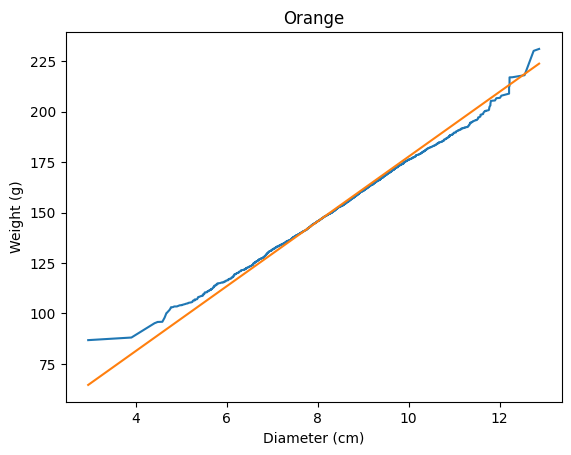

In [39]:
plt.plot(X, Y)
plt.plot(X, coef_angulares[norma == np.min(norma)]*X + b)
plt.title('Orange')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')

# Parabéns por ter chegado até aqui.

https://media.giphy.com/media/l2JJHEW1lToNnJzxe/giphy.gif